In [158]:
import pandas as pd
import sklearn.preprocessing as skp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [159]:
df = pd.read_csv('heart.csv')

# Data Binning
Using MaxHR to create a new categorical column

In [160]:
df['MaxHR Level'] = skp.KBinsDiscretizer(n_bins=5, encode='ordinal').fit_transform(df['MaxHR'].values.reshape(-1, 1))

In [161]:
df['MaxHR Level'].replace(0, 'Low', inplace=True)
df['MaxHR Level'].replace(1, 'Low-Mid', inplace=True)
df['MaxHR Level'].replace(2, 'Mid', inplace=True)
df['MaxHR Level'].replace(3, 'Mid-High', inplace=True)
df['MaxHR Level'].replace(4, 'High', inplace=True)

In [162]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,MaxHR Level
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,High
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,Mid-High
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,Low
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,Low
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,Low-Mid
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0,High
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0,High
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0,Mid
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1,Mid
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0,Low-Mid


# Handling Outliers
Using visualization to identify outliers, then modifying dataframe accordingly

### Handling RestingBP Outliers

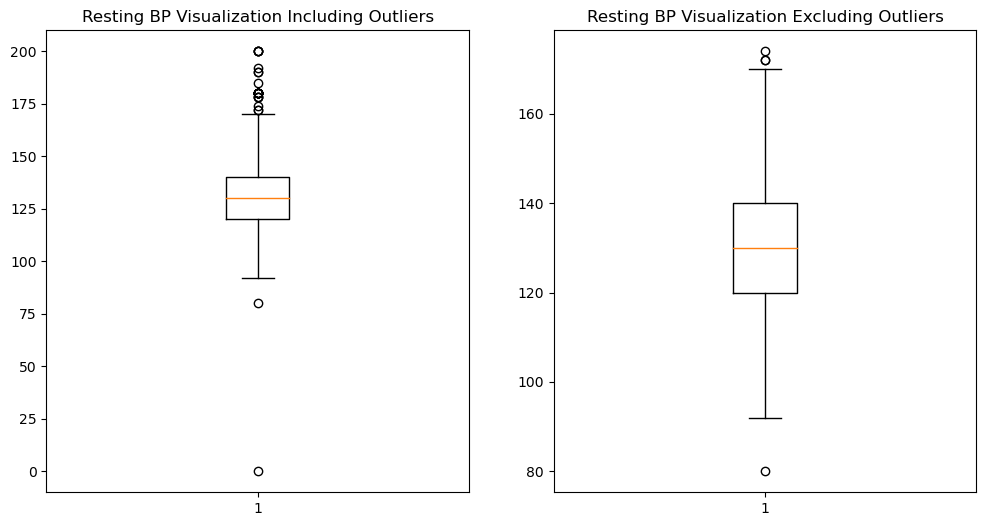

In [163]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(6)

axes[0].boxplot(data=df, x='RestingBP')
axes[0].set_title('Resting BP Visualization Including Outliers')

axes[1].boxplot(df[(df.RestingBP<175)&(df.RestingBP>75)]['RestingBP'])
axes[1].set_title('Resting BP Visualization Excluding Outliers');

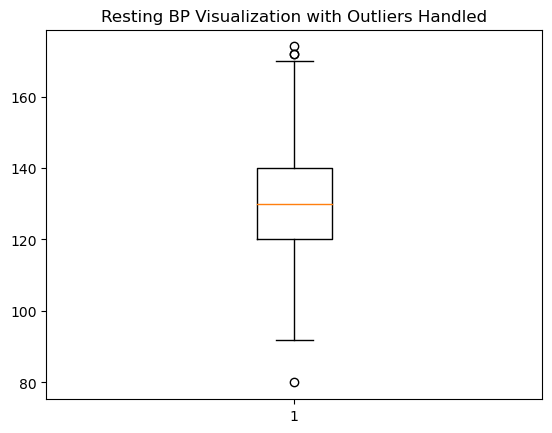

In [164]:
df.loc[(df.RestingBP>175)|(df.RestingBP<75), 'RestingBP'] = df.RestingBP.median()
plt.boxplot(df.RestingBP)
plt.title('Resting BP Visualization with Outliers Handled');

### Handling Cholesterol Outliers

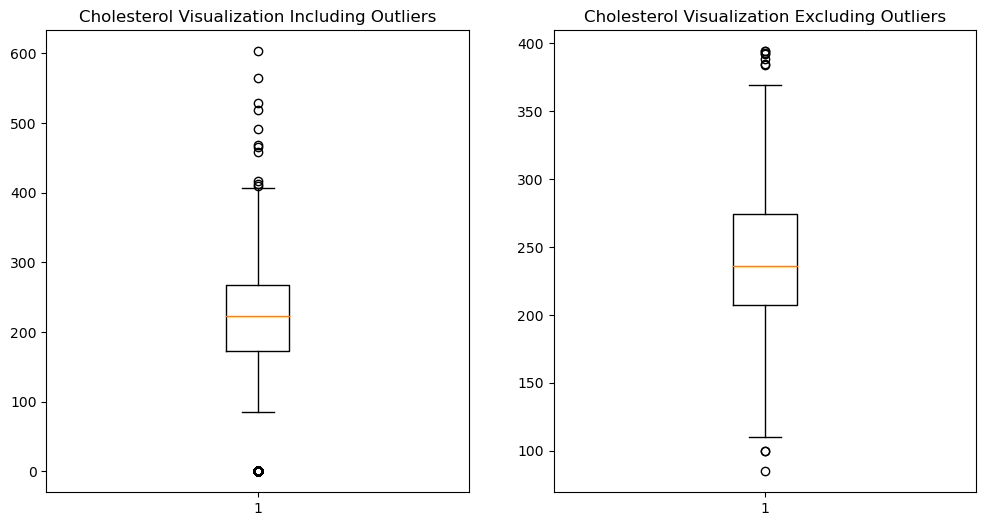

In [165]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(6)

axes[0].boxplot(data=df, x='Cholesterol')
axes[0].set_title('Cholesterol Visualization Including Outliers')

axes[1].boxplot(df[(df.Cholesterol<400)&(df.Cholesterol>80)]['Cholesterol'])
axes[1].set_title('Cholesterol Visualization Excluding Outliers');

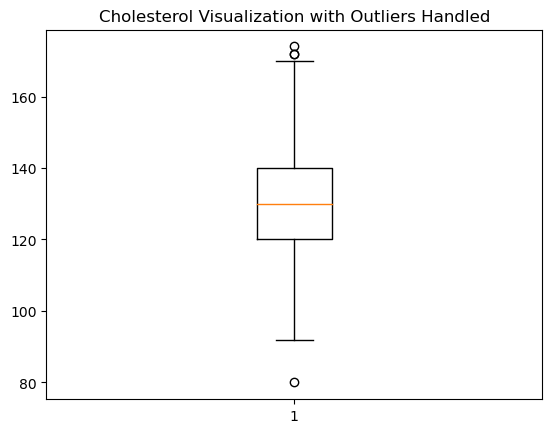

In [166]:
df.loc[(df.Cholesterol>400)|(df.Cholesterol<80), 'Cholesterol'] = df.Cholesterol.median()
plt.boxplot(df.RestingBP)
plt.title('Cholesterol Visualization with Outliers Handled');

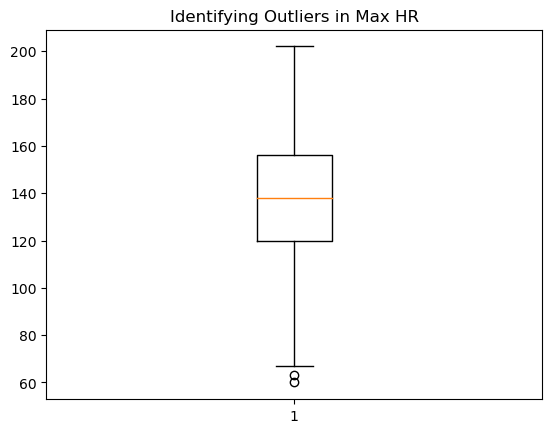

In [167]:
plt.boxplot(df.MaxHR) # Not many outliers, so no modifications done to MaxHR
plt.title('Identifying Outliers in Max HR');

# Visualizations

## Examining Maximum Heart Rate (Max HR)
### We will construct a pie chart to look at the different levels of maximum heart rate
There are 5 levels: Low, Mid-Low, Mid, High-Mid, High. We will look at the prevelance of each level in the dataset by seeing the percentages.

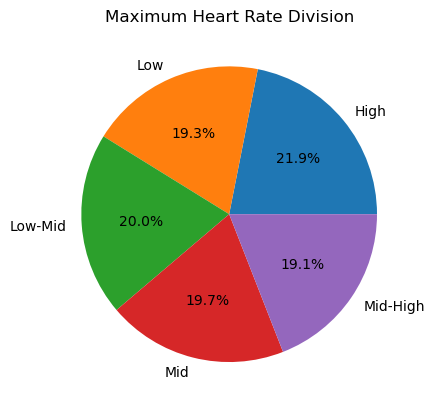

In [170]:
level_count = df.groupby('MaxHR Level').agg('size')
plt.pie(labels=level_count.index, x=level_count.values, autopct='%1.1f%%')
plt.title('Maximum Heart Rate Division');

### We will construct a FacetGrid to look at the maximum heart rates between males and females

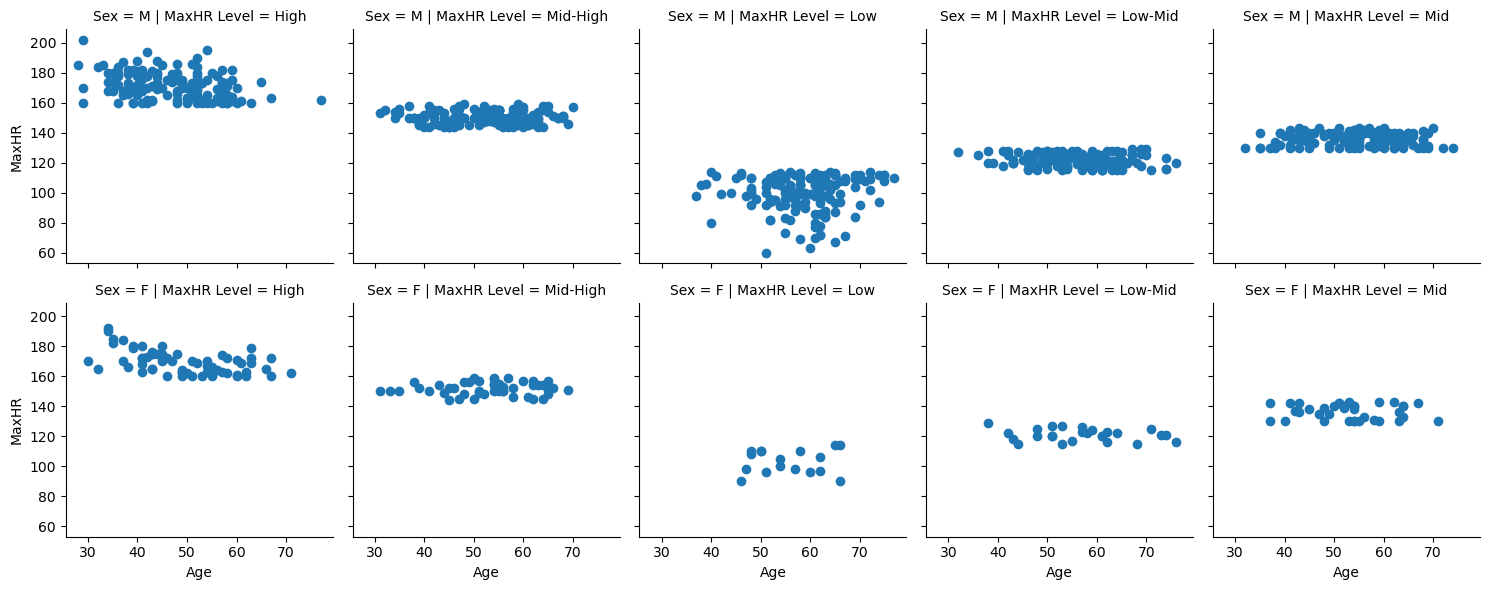

In [182]:
sns.FacetGrid(data=df, col='MaxHR Level', row='Sex').map(plt.scatter, 'Age', 'MaxHR');

### We will construct a barplot to look at the relationship between Max HR and Cholesterol

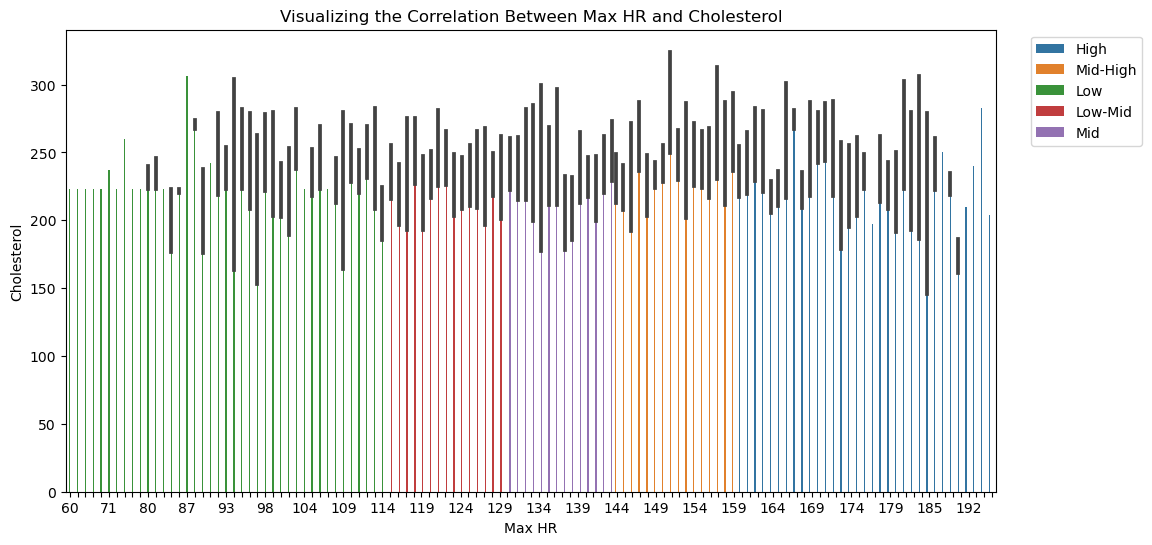

In [225]:
plt.figure(figsize=(12, 6))
bar = sns.barplot(data=df, x='MaxHR', y='Cholesterol', hue='MaxHR Level')
bar.set_xlabel('Max HR')
bar.set_ylabel('Cholesterol')
bar.set_title('Visualizing the Correlation Between Max HR and Cholesterol')
bar.legend(bbox_to_anchor=(1.03, 1))

tick_labels = bar.get_xticklabels() 
for i, label in enumerate(tick_labels):
    if i % 5 != 0: label.set_visible(False)

plt.show();